In [ ]:
import os

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_data = pd.read_csv('C:/Users/dssalpc/Downloads/RF_mobilehealth/revision_data/traindata_2020_afterCovid.csv')

In [ ]:
train_data = train_data.dropna()

In [ ]:
train_data

,contents,star,agree,date,sentiment,year,clean_review
0,Threatening of being fat.silly.have that♤ and ...,4,0,2020-11-24 03:11:46,1,2020,threatening fat sil hav band cool best us ever...
1,Updated with weight management feature missing...,1,0,2020-08-09 10:24:25,0,2020,upd weight man feat miss can't believ purchas ...
2,It was great until the weight loss option was ...,1,0,2020-08-14 09:41:41,0,2020,gre weight loss opt remov look new ap replac thi
3,It's been working great up until a week ago. N...,1,1,2020-10-03 04:42:09,0,2020,work gre week ago step dat long kept count ste...
4,Dropped Syncmytracks support. This app combine...,1,0,2020-10-30 19:40:42,0,2020,drop syncmytrack support thi ap combin samsung...
...,...,...,...,...,...,...,...
19457,All the sudden stress and heart rate don't wor...,2,0,2020-10-30 11:14:05,0,2020,al sud stress heart rat work ev tho hav upd st...
19458,Didn't count my step many times,1,0,2020-06-13 13:42:17,0,2020,count step many tim
19459,So cool,5,0,2020-04-11 18:56:29,1,2020,cool
19460,its useful app,5,0,2020-02-11 05:47:46,1,2020,us ap


In [ ]:
reviews = list(train_data['clean_review'])
sentiments = list(train_data['sentiment'])

In [ ]:
vectorizer = CountVectorizer(analyzer = "word", max_features = 5000) 

x_train = vectorizer.fit_transform(reviews)
y_train = np.array(sentiments)

In [ ]:
x_train

<19462x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 219930 stored elements in Compressed Sparse Row format>

In [ ]:
# from sklearn.ensemble import RandomForestClassifier


# # 랜덤 포레스트 분류기에  100개 의사 결정 트리를 사용한다.
# forest = RandomForestClassifier(max_depth= 10, n_estimators = 200, min_samples_leaf=1, min_samples_split=2) 

# # 단어 묶음을 벡터화한 데이터와 정답 데이터를 가지고 학습을 시작한다.
# forest.fit(x_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_list = {'max_depth': [10, 20, 30, 40, 50],
'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}

rf_model = RandomForestClassifier(random_state = 82)

forest = GridSearchCV(
        estimator=rf_model,
        param_grid = param_list,
        cv = 5,
        n_jobs = -1,
        scoring = 'accuracy',
        verbose = 2)

forest.fit(x_train, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=82), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             scoring='accuracy', verbose=2)

In [ ]:
print("Accuracy: %f" %  forest.score(x_train, y_train))

Accuracy: 0.940397


In [ ]:
#검증데이터셋 성능 평가
test_data = pd.read_csv('C:/Users/dssalpc/Downloads/RF_mobilehealth/revision_data/testdata_2021_afterCovid.csv')
test_data = test_data.dropna()

test_reviews = list(test_data['clean_review'])

In [ ]:
test_data_features = vectorizer.transform(test_reviews)
test_input = test_data_features

realAnswer = list(test_data['sentiment'])
test_label = np.array(realAnswer)

In [ ]:
rf_pred = forest.predict(test_input)

In [ ]:
print("Accuracy: %f" % accuracy_score(test_label, rf_pred))

Accuracy: 0.866178


Text(0.5, 257.44, 'Predicted label')

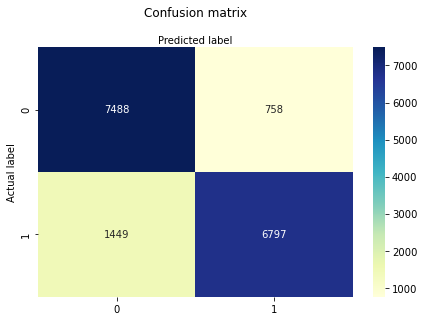

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_label, rf_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(test_label, rf_pred))
print("Precision:",metrics.precision_score(test_label, rf_pred))
print("Recall:",metrics.recall_score(test_label, rf_pred))

Accuracy: 0.8661775406257579
Precision: 0.899669093315685
Recall: 0.8242784380305602


In [ ]:
import joblib 

# 모델 저장
joblib.dump(forest, 'C:/Users/dssalpc/Downloads/RF_mobilehealth/rf_bow_with_gridsearch_afterCovid.pkl')

# 모델 불러오기
rf_model = joblib.load('C:/Users/dssalpc/Downloads/RF_mobilehealth/rf_bow_with_gridsearch_afterCovid.pkl')

In [ ]:
rf_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=82), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             scoring='accuracy', verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rf_model.predict(test_input)
predictions = [value for value in y_pred]

accuracy_score(test_label, predictions)

0.8661775406257579

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(test_label, y_pred, target_names=['class low', 'class high'], output_dict=True)
df = pd.DataFrame(report).transpose()

df

,precision,recall,f1-score,support
class low,0.837865,0.908077,0.871559,8246.000000
class high,0.899669,0.824278,0.860325,8246.000000
accuracy,0.866178,0.866178,0.866178,0.866178
macro avg,0.868767,0.866178,0.865942,16492.000000
weighted avg,0.868767,0.866178,0.865942,16492.000000


In [ ]:
forest.best_params_

{'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}